# Summary: 

The functions in this package are intended to represent the 
stochastic dynamics of viral load, infectivitiy, and test positivity
in SARS-CoV-2 infections. Currently, these are parameterised using data from 
Kissler 2020 (DOI: 10.1101/2020.10.21.20217042). 

The parameter estimates still contain significant uncertainty ,and do
not account for differences due to new variants or vaccines.

In [1]:
include("src/viral_load_infectivity_testpos_v2.jl")

run_testing_scenario (generic function with 2 methods)

# Main Functions

In [2]:
@doc(init_VL_and_infectiousness)

```
init_VL_and_infectiousness(Ntot::Int, Pisol::Float64)
```

Randomly generate all viral load and infectivity data for a simulation

## Arguments:

`Ntot` = Number of individuals to simulate `Pisol` = Probability of self-isolation at symptom onset

## Returns:

`Dict` = Container with generated parameters including:

```
    "Ntot" => `Int` = Number of individuals in simulation (indexed 1:Ntot)

    "asymptomatic" => `Array{Bool,1}` = Asymptomatic status for each individual

    "isolation_time" => `Array{Int64,1}` = Day of isolation for each individual 
                                       (to be filled later)

     "will_isolate" => `Array{Bool,1}` = Indicator of whether an individual will
                                     isolate at symptom onset time
    
     "VL_mag" => `Array{Float64,1}` = Peak viral load for each individual

     "inf_mag" => `Array{Float64,1}` = Peak infectivity for each individual

     "infection_profiles" => `Array{Array{Float64,1},1}` = infectivity for each day
                        since infection, for each individual

     "VL_profiles" => `Array{Array{Float64,1},1}` = viral load for each day
                        since infection, for each individual

     "days_infectious" => `Array{Int64,1}` = Number of days spent with infectivity
                                           > 0 for each individual

      "symp_day" => `Array{Int64,1}` = Day at which individuals would isolate due to
                                     symptom onset

      "non_isolators" => `Array{Int64,1}` = Array of indices ofindividuals who would 
                                      refuse to isolate if they developed symptoms
```


In [3]:
@doc(init_testing!)

```
init_testing!(sim::Dict, testing_params::Dict, i_day::Int, Ndays::Int)
```

Function to initialise test positive profiles and test isolation probabilities

## Arguments:

`sim` = Dict generated by `init_VL_and_infectiousness(Ntot::Int, Pisol::Float64)`

`testing_params` = Dict containing testing options, must have:

```
"new_comply_prob" => `Float` = Probability that people who would not comply
                   with symptom onset isolation, will comply with testing isolation

"tperiod" => `Int` = Days between repeat tests

"protocol" => `String` = Current available options are given by the parameters
                        `PCR_mass_protocol` and `LFD_mass_protocol`
```

`i_day` = Day to start simulation on (counting from 1)

`Ndays` = Total number of days to simulate (counting from 1)

## Returns:

`Array{Int64,1}` = Days when testing will occur

`Int64` = Next testing day index (from `i_day`)

## See also:

`init_VL_and_infectiousness(Ntot::Int, Pisol::Float64)`


# Example usage:

Generate a new simulation with 50 individuals and probability 0.8 that they self-isolate if they develop symptoms

In [4]:
sim = init_VL_and_infectiousness(50, 0.8)

Dict{String,Any} with 11 entries:
  "will_isolate"       => Bool[0, 0, 1, 0, 0, 1, 0, 0, 1, 0  …  0, 0, 1, 0, 1, …
  "inf_mag"            => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  … …
  "isolation_time"     => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0…
  "VL_mag"             => [6.78262, 8.7074, 6.78472, 8.12891, 8.41178, 8.35582,…
  "Ntot"               => 50
  "asymptomatic"       => Bool[1, 1, 0, 0, 1, 0, 1, 1, 0, 1  …  1, 1, 0, 1, 0, …
  "non_isolators"      => [4, 15, 20, 23, 30, 33, 36, 37, 39, 42, 47]
  "infection_profiles" => [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.160796, 1…
  "VL_profiles"        => [[0.373418, 1.04813, 1.72285, 2.39756, 3.07228, 3.746…
  "symp_day"           => [8, 23, 5, 8, 5, 2, 3, 5, 7, 9  …  4, 10, 1, 3, 3, 3,…
  "days_infectious"    => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0…

Initialise repeat mass LFD testing every 3 days

Assume 50% of people who would have ignored symptoms will isolate with a test (new_comply_prob)

Calling `init_testing!` will add "test_pos_profiles" and "will_isolate_with_test" fields to sim

In [5]:
test_params = Dict("new_comply_prob"=>0.5, "tperiod"=>3, "protocol"=>LFD_mass_protocol) 
i_day = 1    #everyone is infected on day 1
Ndays = 20    #stop after 20 days
test_days, test_counter = init_testing!(sim, test_params, i_day, Ndays)
sim

Dict{String,Any} with 16 entries:
  "will_isolate"           => Bool[0, 0, 1, 0, 0, 1, 0, 0, 1, 0  …  0, 0, 1, 0,…
  "inf_mag"                => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0…
  "isolation_time"         => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, …
  "will_isolate_with_test" => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1,…
  "test_protocol"          => 2
  "testing_paused"         => Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0,…
  "VL_mag"                 => [6.78262, 8.7074, 6.78472, 8.12891, 8.41178, 8.35…
  "Ntot"                   => 50
  "asymptomatic"           => Bool[1, 1, 0, 0, 1, 0, 1, 1, 0, 1  …  1, 1, 0, 1,…
  "resume_testing"         => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -…
  "non_isolators"          => [4, 15, 20, 23, 30, 33, 36, 37, 39, 42, 47]
  "infection_profiles"     => [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16079…
  "VL_profiles"            => [[0.373418, 1.04813, 1.72285, 2.39756, 3.07228, 3…
  "symp_day"     

Now `test_days` contains a randomly generated a test pattern with 3 day intervals, and `test_counter` tells us which test day is next, based on the value of `i_day`

We can use this to estimate how much a person's infectiousness is reduced by symptom isolation and test isolation
by assuming that it drops to 0 when isolated.

In [6]:
isolation_period = 10 
sim["isolation_time"] = zeros(Int64,sim["Ntot"])
sim["infection_profiles_without_testing"]  = copy(sim["infection_profiles"])
for n in 1:sim["Ntot"]
    sim["infection_profiles_without_testing"][n] = copy(sim["infection_profiles"][n])
    for i in i_day:Ndays
        if (sim["isolation_time"][n] == 0) || (i > sim["isolation_time"][n] + isolation_period)
            if (sim["will_isolate"][n]) && (i == sim["symp_day"][n]+1)
                last_day = min(i + isolation_period,length(sim["infection_profiles_without_testing"][n]))
                sim["infection_profiles_without_testing"][n][i:last_day] .= 0
                sim["isolation_time"][n] = i
            end
        end
    end
end

sim["isolation_time"] = zeros(Int64,sim["Ntot"])
sim["infection_profiles_with_testing"] = copy(sim["infection_profiles"])
for n in 1:sim["Ntot"]
    sim["infection_profiles_with_testing"][n] = copy(sim["infection_profiles"][n])
    td = test_counter
    for i in i_day:Ndays
        if (sim["isolation_time"][n] == 0) || (i > sim["isolation_time"][n] + isolation_period)
            if (sim["will_isolate"][n]) && (i == sim["symp_day"][n]+1)
                last_day = min(i + isolation_period,length(sim["infection_profiles_without_testing"][n]))
                sim["infection_profiles_with_testing"][n][i:last_day] .= 0
                sim["isolation_time"][n] = i
            elseif i == test_days[td] 
                if i < length(sim["test_pos_profiles"][n]) && rand() < sim["test_pos_profiles"][n][i+1]
                    last_day = min(i + isolation_period,length(sim["infection_profiles_with_testing"][n]))
                    sim["infection_profiles_with_testing"][n][(i+1):last_day] .= 0
                    sim["isolation_time"][n] = i
                end
                td += 1
            end
        end
    end
end

Plot random person's trajectory

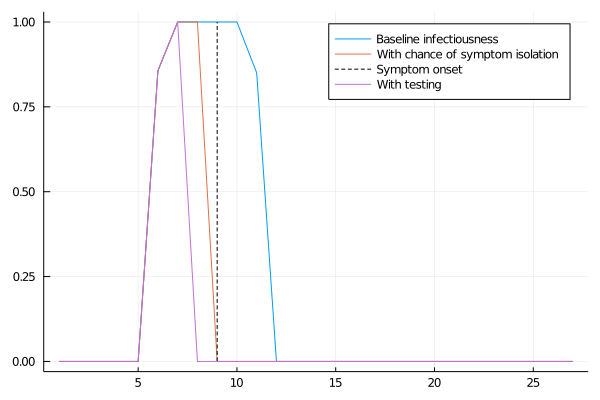

In [37]:
nh = rand(1:sim["Ntot"])
Plots.plot(sim["infection_profiles"][nh],label="Baseline infectiousness")
if(sim["will_isolate"][nh])
    Plots.plot!(sim["infection_profiles_without_testing"][nh],label="With chance of symptom isolation")
    Plots.plot!([sim["symp_day"][nh]+1,sim["symp_day"][nh]+1],
            [0,ceil(max(sim["infection_profiles"][nh]...))],
            style=:dash,color=:black,label="Symptom onset")
end
Plots.plot!(sim["infection_profiles_with_testing"][nh],label="With testing")

Using repeat testing scripts to reproduce previous results

To simulate all repeat scenarios

In [39]:
include("src/repeat_testing_scenarios.jl")

@doc(run_testing_scenarios_impact)

```
run_testing_scenarios_impact(Ntot::Int, Pisol::Float64, LFD_comply::Float64, 
                                  Conf_PCR::Bool; LFD_type::Int=1)
```

## Arguments:

`Ntot` = Number of profiles to generate `LFD_comply` = probability of doing each LFD test `Conf_PCR` = Do confirmatory PCR after positive LFD (if negative stop isolating early) `LFD_type` = If 2 use lower sensitvity

## Returns:

`sim_scens` = Array of Dicts, one for each scenario simulated `sim_names` = Names of scenarios simulated


# Default parameters

The following parameters are defined as `const` in the code. When manually updating these
be sure to restart the kernel and reload the module.

## Viral load dynamics

Onset time in days -- `0.38 * Onset to Peak Time`

Onset to peak viral load time in days -- `Gamma(alpha_peak, 1/beta_peak)`

Peak viral load to LOD time in days -- `Gamma(alpha_decay_symp, 1/beta_decay)`

Peak viral load to LOD time in days -- `Gamma(alpha_decay_asymp, 1/beta_decay)` 

Peak viral load in log10 copies/ml -- `Normal(peakVL_mean,peakVL_sd)`

Viral load LOD in log10 copies/ml -- `VL_LOD_Kissler`

In [8]:
print("(", alpha_peak, ", ", beta_peak, ")\n")
print("(", alpha_decay_symp, ", ", beta_decay, ")\n")
print("(", alpha_decay_asymp, ", ", beta_decay, ")\n")
print("(", peakVL_mean,", ", peakVL_sd, ")\n")
print(VL_LOD_Kissler, "\n")

(1.0499999999999998, 0.7)
(2.4499999999999997, 0.7)
(3.15, 0.3)
(2.01, 0.3)
(7.533, 1.164)
2.66


## Testing parameters

Params for PCR positive vs. VL in log10 copies/ml -- `logistic_function(x, x0, k, ymax)`

Params for LFD positive vs. VL in log10 copies/ml -- `stepwise probabilities relative to PCR -- see LFDtest_positive_prob1`

For PCR:

In [8]:
print("(x0 = ", PCR_VL0, ", k = ", PCR_VLdisp, ", ymax = ", PCR_sens_max, ")\n")

(x0 = 1.9333030852994555, k = 4.408, ymax = 0.95)


## Symptom onset characteristics

`p_asymp` is the proportion of people who never develop symptoms

symptom onset time is gamma distributed: `Gamma(symp_alpha, 1/symp_beta)` truncated to be within two days of peak viral load

In [9]:
print(p_asymp,"\n")
print("(", symp_alpha, ", ", symp_beta, ")\n")

0.5
(3.4653254437869814, 0.7159763313609466)


# Other notes

On first use, it may be necessary to uncomment the first 7 lines
of code to install the required packages